<a href="https://www.kaggle.com/code/ahmadlutfichehasan/introvert-extrovert-behavior-classification-ml?scriptVersionId=245116074" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, svm

In [2]:
df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df.head()
#mixed data
#needs encoding

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
df.shape
# 2900 observations and 8 features

(2098, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2098 non-null   float64
 1   Stage_fear                 2098 non-null   object 
 2   Social_event_attendance    2098 non-null   float64
 3   Going_outside              2098 non-null   float64
 4   Drained_after_socializing  2098 non-null   object 
 5   Friends_circle_size        2098 non-null   float64
 6   Post_frequency             2098 non-null   float64
 7   Personality                2098 non-null   object 
dtypes: float64(5), object(3)
memory usage: 147.5+ KB


In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.00000
mean,4.186368,4.228313,3.246902,6.617731,3.86082
std,3.454599,2.902783,2.255508,4.354215,2.95341
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,2.000000,1.000000,3.000000,1.00000
50%,3.000000,4.000000,3.000000,6.000000,3.00000
75%,7.000000,7.000000,5.000000,10.000000,6.00000
max,11.000000,10.000000,7.000000,15.000000,10.00000


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Personality', axis=1), df['Personality'], test_size=0.2, random_state=42)

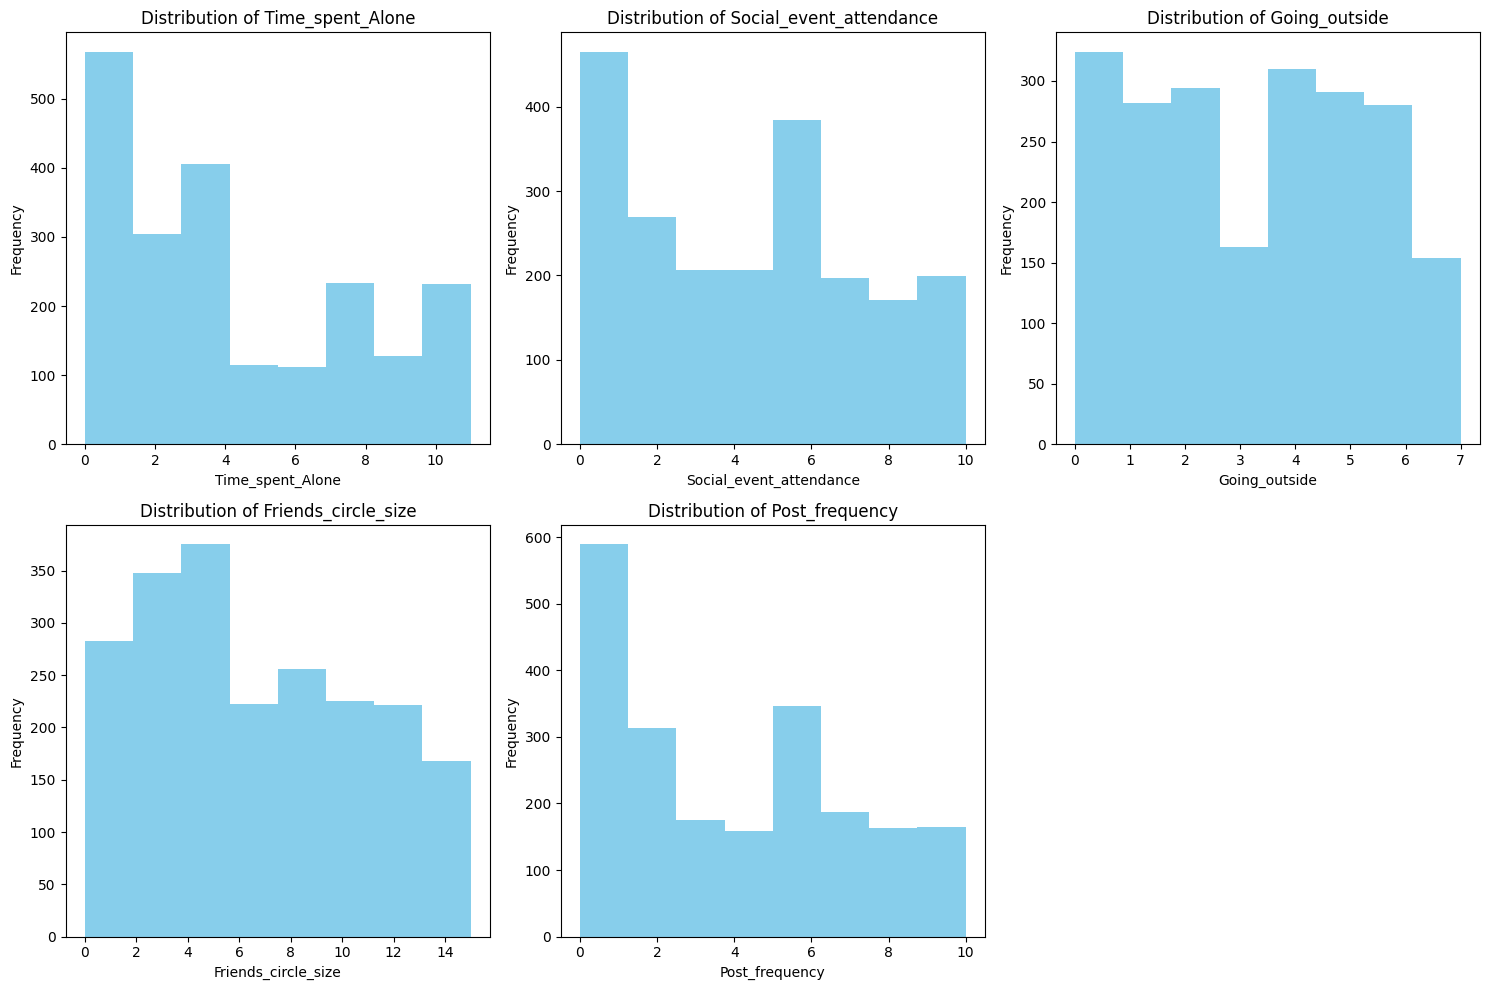

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=8, color='skyblue') # Using dropna to handle any potential NaNs
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
# Calculate normalized counts
normalized_counts = df['Personality'].value_counts(normalize=True)

print("Normalized counts of Personality classes:")
display(normalized_counts)

Normalized counts of Personality classes:


Personality
Extrovert    0.57245
Introvert    0.42755
Name: proportion, dtype: float64

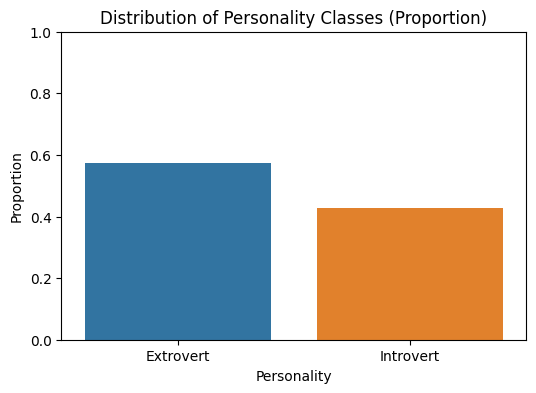

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=normalized_counts.index, y=normalized_counts.values)
plt.title('Distribution of Personality Classes (Proportion)')
plt.xlabel('Personality')
plt.ylabel('Proportion')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for proportion
plt.show()

'Correlation Matrix of Numerical Features:'

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.734916,-0.753786,-0.715702,-0.726493
Social_event_attendance,-0.734916,1.000000,0.738823,0.725536,0.729325
Going_outside,-0.753786,0.738823,1.000000,0.728105,0.756394
Friends_circle_size,-0.715702,0.725536,0.728105,1.000000,0.694271
Post_frequency,-0.726493,0.729325,0.756394,0.694271,1.000000


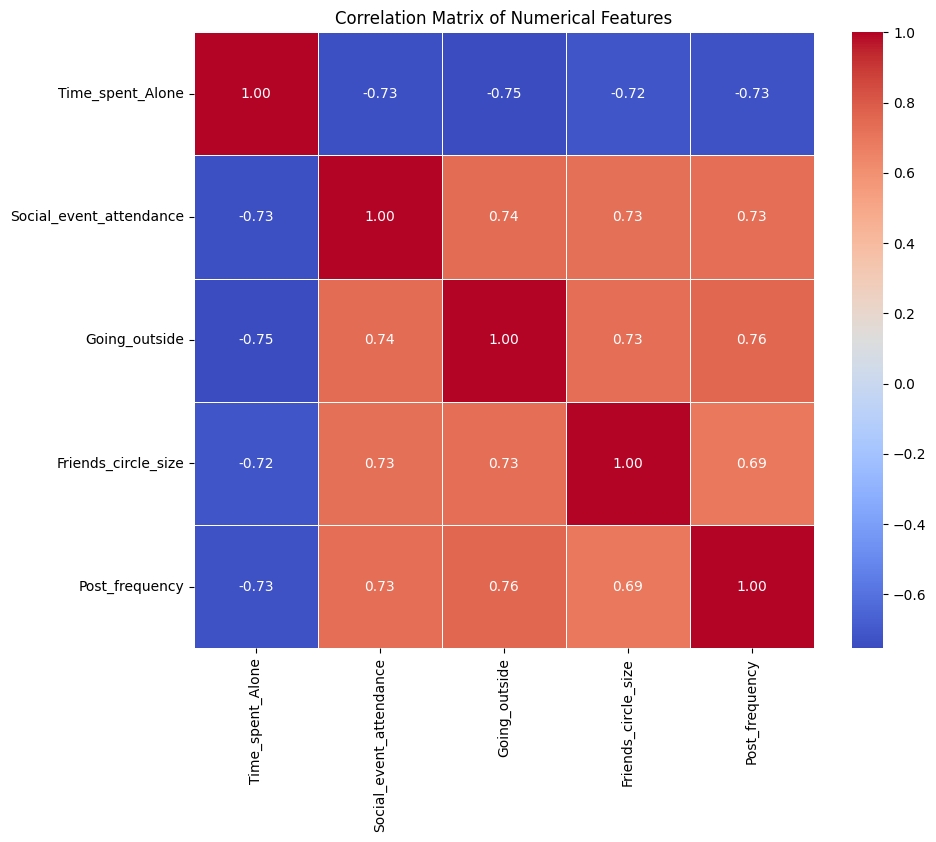

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
display("Correlation Matrix of Numerical Features:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

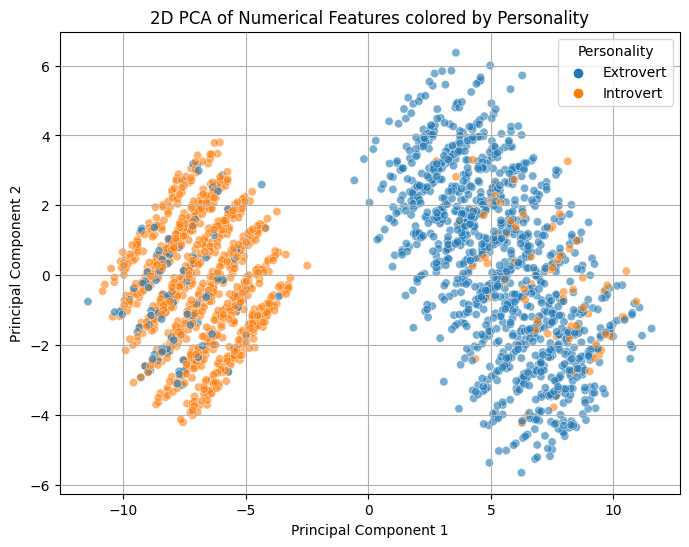

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns and handle potential NaNs
numerical_df = df.select_dtypes(include=np.number).dropna()

# Separate features (X) and target (Y) for the numerical data
# Ensure the target variable aligns with the numerical data after dropping NaNs
Y_aligned = df.loc[numerical_df.index, 'Personality']


# Initialize PCA and reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_df)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['Personality'] = Y_aligned.values

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Personality', data=pca_df, alpha=0.6)
plt.title('2D PCA of Numerical Features colored by Personality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [14]:
X = df.drop('Personality', axis=1)
Y = df['Personality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Original data shape:", df.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Original data shape: (2098, 8)
X_train shape: (1678, 7)
X_test shape: (420, 7)
Y_train shape: (1678,)
Y_test shape: (420,)


In [15]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X_train.select_dtypes(include='object').columns


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))


new_column_names = encoder.get_feature_names_out(categorical_cols)


X_train_encoded.columns = new_column_names
X_test_encoded.columns = new_column_names


X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)


X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train_encoded = X_train_encoded.reset_index(drop=True)
X_test_encoded = X_test_encoded.reset_index(drop=True)


X_train_processed = pd.concat([X_train, X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test, X_test_encoded], axis=1)

display("Processed Training Features (first 5 rows):")
display(X_train_processed.head())
display("Processed Testing Features (first 5 rows):")
display(X_test_processed.head())

'Processed Training Features (first 5 rows):'

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,9.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,8.0,6.0,12.0,8.0,1.0,0.0,1.0,0.0
2,4.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
3,7.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,1.0
4,8.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0


'Processed Testing Features (first 5 rows):'

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,3.0,8.0,6.0,7.0,5.0,1.0,0.0,1.0,0.0
1,10.0,3.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0
2,8.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
3,7.0,2.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0
4,7.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

display("Encoded Training Target (first 5 values):")
display(Y_train_encoded[:5])
display("Encoded Testing Target (first 5 values):")
display(Y_test_encoded[:5])


'Encoded Training Target (first 5 values):'

array([1, 1, 1, 1, 0])

'Encoded Testing Target (first 5 values):'

array([0, 1, 1, 1, 1])

In [17]:
model = LogisticRegression(random_state=42)

# Train the model using the processed training data
model.fit(X_train_processed, Y_train_encoded)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [18]:
# Make predictions on the test data
Y_pred = model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_encoded, Y_pred)
precision = precision_score(Y_test_encoded, Y_pred)
recall = recall_score(Y_test_encoded, Y_pred)
f1 = f1_score(Y_test_encoded, Y_pred)
conf_matrix = confusion_matrix(Y_test_encoded, Y_pred)
class_report = classification_report(Y_test_encoded, Y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9310
Precision: 0.9058
Recall: 0.9402
F1-Score: 0.9227

Confusion Matrix:


array([[218,  18],
       [ 11, 173]])


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       236
           1       0.91      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



In [19]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train_processed, Y_train_encoded)

print("Gaussian Naive Bayes model trained successfully!")

Gaussian Naive Bayes model trained successfully!


In [20]:
from sklearn import tree

# Initialize the Decision Tree model
# You can add hyperparameters here later if you want to tune the model
dt_model = tree.DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_processed, Y_train_encoded)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


In [21]:
from sklearn import svm

# Initialize the SVM model
# SVM can be sensitive to scaling, but let's start with the default parameters
svm_model = svm.SVC(random_state=42)

# Train the model
svm_model.fit(X_train_processed, Y_train_encoded)

print("Support Vector Machine model trained successfully!")

Support Vector Machine model trained successfully!


In [22]:
# Make predictions with Gaussian Naive Bayes
Y_pred_gnb = gnb_model.predict(X_test_processed)

# Evaluate Gaussian Naive Bayes
accuracy_gnb = accuracy_score(Y_test_encoded, Y_pred_gnb)
precision_gnb = precision_score(Y_test_encoded, Y_pred_gnb)
recall_gnb = recall_score(Y_test_encoded, Y_pred_gnb)
f1_gnb = f1_score(Y_test_encoded, Y_pred_gnb)
conf_matrix_gnb = confusion_matrix(Y_test_encoded, Y_pred_gnb)
class_report_gnb = classification_report(Y_test_encoded, Y_pred_gnb)

print("--- Gaussian Naive Bayes Evaluation ---")
print(f"Accuracy: {accuracy_gnb:.4f}")
print(f"Precision: {precision_gnb:.4f}")
print(f"Recall: {recall_gnb:.4f}")
print(f"F1-Score: {f1_gnb:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_gnb)
print("\nClassification Report:")
print(class_report_gnb)

--- Gaussian Naive Bayes Evaluation ---
Accuracy: 0.9310
Precision: 0.9058
Recall: 0.9402
F1-Score: 0.9227

Confusion Matrix:


array([[218,  18],
       [ 11, 173]])


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       236
           1       0.91      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



In [23]:
# Make predictions with Decision Tree
Y_pred_dt = dt_model.predict(X_test_processed)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(Y_test_encoded, Y_pred_dt)
precision_dt = precision_score(Y_test_encoded, Y_pred_dt)
recall_dt = recall_score(Y_test_encoded, Y_pred_dt)
f1_dt = f1_score(Y_test_encoded, Y_pred_dt)
conf_matrix_dt = confusion_matrix(Y_test_encoded, Y_pred_dt)
class_report_dt = classification_report(Y_test_encoded, Y_pred_dt)

print("--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)

--- Decision Tree Evaluation ---
Accuracy: 0.7976
Precision: 0.8113
Recall: 0.7011
F1-Score: 0.7522

Confusion Matrix:


array([[206,  30],
       [ 55, 129]])


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       236
           1       0.81      0.70      0.75       184

    accuracy                           0.80       420
   macro avg       0.80      0.79      0.79       420
weighted avg       0.80      0.80      0.80       420



In [24]:
# Make predictions with SVM
Y_pred_svm = svm_model.predict(X_test_processed)

# Evaluate SVM
accuracy_svm = accuracy_score(Y_test_encoded, Y_pred_svm)
precision_svm = precision_score(Y_test_encoded, Y_pred_svm)
recall_svm = recall_score(Y_test_encoded, Y_pred_svm)
f1_svm = f1_score(Y_test_encoded, Y_pred_svm)
conf_matrix_svm = confusion_matrix(Y_test_encoded, Y_pred_svm)
class_report_svm = classification_report(Y_test_encoded, Y_pred_svm)


print("--- Support Vector Machine (SVM) Evaluation ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

--- Support Vector Machine (SVM) Evaluation ---
Accuracy: 0.9310
Precision: 0.9058
Recall: 0.9402
F1-Score: 0.9227

Confusion Matrix:


array([[218,  18],
       [ 11, 173]])


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       236
           1       0.91      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



In [25]:
# Create a dictionary to store the metrics
performance_metrics = {
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy, accuracy_gnb, accuracy_dt, accuracy_svm],
    'Precision': [precision, precision_gnb, precision_dt, precision_svm],
    'Recall': [recall, recall_gnb, recall_dt, recall_svm],
    'F1-Score': [f1, f1_gnb, f1_dt, f1_svm]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(performance_metrics)

# Display the performance comparison table
display("Model Performance Comparison:")
display(performance_df)

'Model Performance Comparison:'

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.930952,0.905759,0.940217,0.922667
1,Gaussian Naive Bayes,0.930952,0.905759,0.940217,0.922667
2,Decision Tree,0.797619,0.811321,0.701087,0.752187
3,SVM,0.930952,0.905759,0.940217,0.922667


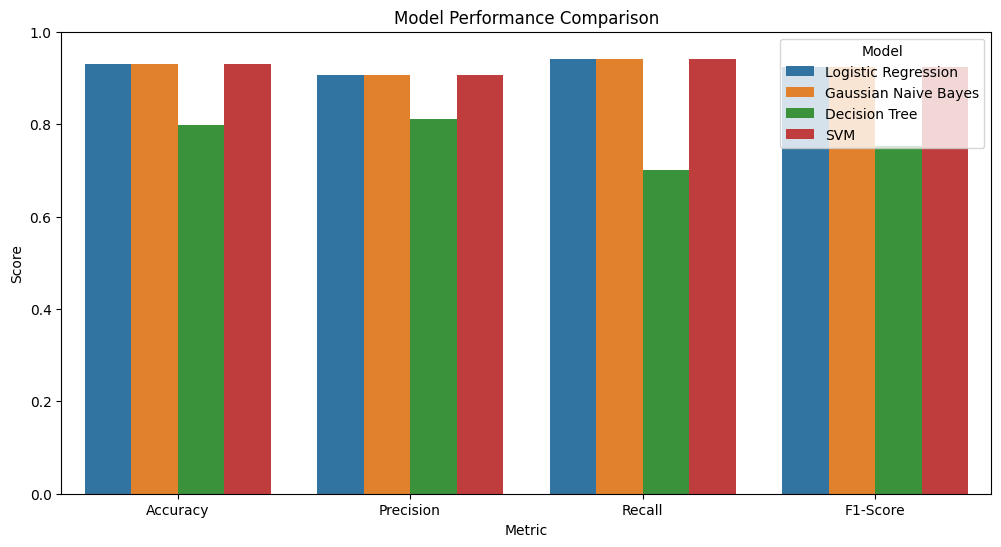

In [26]:
# Melt the DataFrame for easier plotting
performance_melted = performance_df.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()